In [1]:
import numpy
import numpy as np
import scipy
from os.path import join
import matplotlib.pyplot as plt
import matplotlib
import colorsys
import texplot
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from pprint import pprint
import freealg

# Moved to freealg
from freealg.visualization import domain_coloring, glue_branches
from freealg.distributions import MarchenkoPastur, ChiralBlock, DeformedWigner, \
    DeformedMarchenkoPastur, CompoundPoisson

from freealg import AlgebraicForm
from freealg._algebraic_form._sheets_util import track_roots_on_grid, infer_m1_partners_on_cuts
from freealg._algebraic_form._continuation_algebraic import eval_roots, build_sheets_from_roots

plot_dir = '.'

In [2]:
filename = 'algebraic-deformed-mp'
title = 'Deformed Marchenko-Pastur'

c = 0.1
t1 = 2.0
t2 = 5.5
w1 = 0.75

# c = 0.05
# t1 = 2.0
# t2 = 2.0
# w1 = 0.5

dmp = DeformedMarchenkoPastur(t1, t2, w1, c)

# Support
support = dmp.support()
print(support)
a1, b1 = support[0]
if len(support) > 1:
    a2, b2 = support[1]

# Grid
x_min = numpy.floor(min(a for a, b in support) - 2.0)
x_max = numpy.ceil(max(b for a, b in support) + 2.0)
y_min, y_max = -3.0, 3.0

def stieltjes(z):
    return dmp.stieltjes(z)

def density(x):
    return dmp.density(x, eta=1e-6)

def m_all_fn(z):
    return dmp.roots(z)

[(1.005518159668944, 3.1256892314391456), (4.16272377987857, 7.595354543299054)]


In [73]:
filename = 'algebraic-bipartite'
title = 'Bipartite Model'
alpha = -1
beta = 1
c = 1.0

cb = ChiralBlock(alpha, beta, c)

# Support
support = cb.support()
a1, b1 = support[0]
a2, b2 = support[1]

# Grid for bipartite
x_min, x_max = -3.0, 3.0
y_min, y_max = -2.0, 2.0

def stieltjes(z):
    return cb.stieltjes(z, alt_branch=False)

def density(x):
    return cb.density(x)[0]

In [3]:
filename = 'algebraic-deformed-wigner'
title = 'Deformed Wigner'

sigma = 1.0
t1 = -1.5
t2 = 2.5
w1 = 0.25


dwg = DeformedWigner(t1, t2, w1, sigma)

# Support
support = dwg.support()
a1, b1 = support[0]
a2, b2 = support[1]

# Grid
x_min = numpy.floor(min(a for a, b in support) - 1.0)
x_max = numpy.ceil(max(b for a, b in support) + 1.0)
y_min, y_max = -3.0, 3.0


def stieltjes(z):
    return dwg.stieltjes(z)

def density(x):
    return dwg.density(x, eta=1e-6)

def m_all_fn(z):
    return dwg.roots(z)

In [2]:
filename = 'algebraic-compound-poisson'
title = 'Compound Free Poisson'

# # Has atom at zero with mass max(1-lam, 0)
# a1 = 0.5
# a2 = 2.0
# w1 = 0.5
# lam = 0.1  # has an atom

lam = 0.1
t1 = 2.0
t2 = 5.5
w1 = 0.75


cp = CompoundPoisson(t1, t2, w1, lam)

# Support
support = cp.support()
print(support)
a1, b1 = support[0]
if len(support) > 1:
    a2, b2 = support[1]

# Grid
x_min = numpy.floor(min(a for a, b in support) - 1.0)
x_max = numpy.ceil(max(b for a, b in support) + 1.0)
y_min, y_max = -3.0, 3.0

def stieltjes(z):
    return cp.stieltjes(z)

def density(x):
    rho = cp.density(x, eta=1e-8)
    # rho[x < 1e-3] = 0.0
    return rho

def m_all_fn(z):
    return cp.roots(z)

[(0.9018267066766694, 3.2283308327081777), (3.995360090022506, 7.759703675918981)]



Initial mass: 0.099936
Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-compound-poisson-density.pdf".


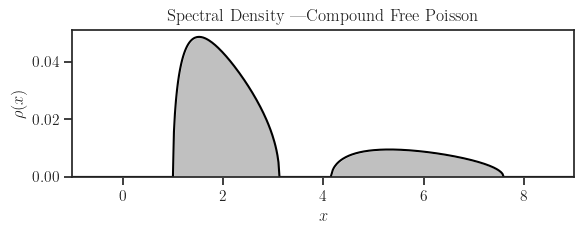

In [3]:
x = numpy.linspace(x_min, x_max, 500)
rho = density(x)

mass = numpy.trapz(rho, x)
print('\nInitial mass: %f' % mass)

with texplot.theme(rc={'font.family': 'serif'}, use_latex=True):
    fig, ax = plt.subplots(figsize=(6, 2.5))
    ax.plot(x, rho, color='black')
    ax.fill_between(x, y1=rho, facecolor='silver')

    ax.set_xlim([x_min, x_max])
    ax.set_ylim(bottom=0)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho(x)$')
    ax.set_title(r'Spectral Density |' + title)

    plt.tight_layout()
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename +'-density.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

In [7]:
x_cp = x
rho_cp = rho

In [4]:
x_dmp = x
rho_dmp = rho

Plot saved to "/home/sia/work/github/freealg/notebooks/./comparison.pdf".


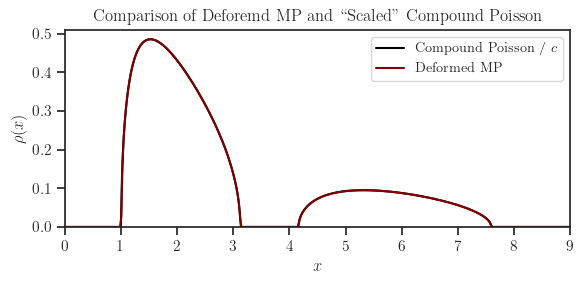

In [8]:
with texplot.theme(use_latex=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(x_cp, rho_cp / lam, label=r'Compound Poisson / $c$', color='black')
    ax.plot(x_dmp, rho_dmp, label='Deformed MP', color='maroon')
    ax.set_ylim(bottom=0)
    ax.set_xlim([0, 9])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho(x)$')
    ax.set_title("Comparison of Deforemd MP and ``Scaled'' Compound Poisson")
    ax.legend(fontsize='small')
    plt.tight_layout()
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, 'comparison.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

In [3]:
# A = dmp.matrix(4000, seed=0)
A = dwg.matrix(4000, seed=0)
# A = cp.matrix(10000, seed=0)

eig_A = numpy.linalg.eigvalsh(A)
numpy.save('A.npy', A)
numpy.save('eig_A.npy', eig_A)

In [4]:
print(numpy.mean(eig_A))
print(numpy.std(eig_A))

1.4999926076712469
2.0005059993200844


In [38]:
A = numpy.load('A.npy')
eig_A = numpy.load('eig_A.npy')

In [39]:
As = freealg._util.subsample_matrix(A, 5000, seed=1)
eig_As = numpy.linalg.eigvalsh(As)
print(A.shape)
print(As.shape)

(10000, 10000)
(5000, 5000)


fit residual max  : 2.0015e-16
fit residual 99.9%: 6.8340e-17

Coefficients (real)
+0.00049394 +0.00356257 +0.00489004 +0.00000000 
+0.00000000 +0.00049394 +0.00370457 +0.00543338 

Coefficients (imag) norm: 0.0000e+00

	frac_bad: 1.000
	n_bad   : 128
	n_test  : 128
{'fit_metrics': {'gap_ratio': 168387929654096.44,
                 'n_small': 1.0,
                 's_min': 1.544802627467438e-15},
 'frac_bad': 1.0,
 'n_bad': 128,
 'n_test': 128,
 'ok': False,
 'res_99_9': 6.834017936133213e-17,
 'res_max': 2.0014830212433607e-16}

Support:
[(1.005518159668918, 3.1256892314391838), (4.162723779878492, 7.595354543298932)]



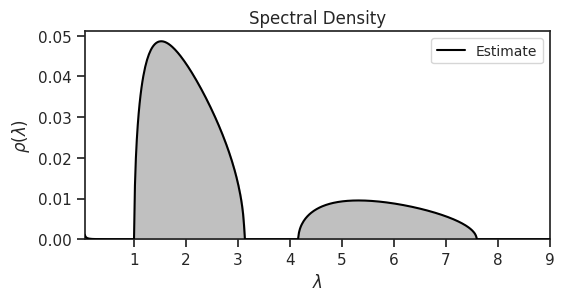

mass: 0.100053


In [5]:
# af = AlgebraicForm(dmp, support)
af = AlgebraicForm(cp, support)
# af = AlgebraicForm(cb)
# af = AlgebraicForm(A, delta=1e-5)
# af = AlgebraicForm(As, delta=1e-5)

deg_m = 3
deg_z = 1
reg = 0

# mu1 = numpy.mean(eig_As)
# mu2 = numpy.var(eig_As)

coeffs, est_supp, status = af.fit(
    deg_m, deg_z, reg, normalize=False, triangular=None,
    mu=[1],
    # mu=[1, mu1, mu2],
    mu_reg=None, verbose=True)

pprint(status)

print('\nSupport:')
print(est_supp)
print('')

# x = numpy.linspace(x_min, x_max, 500)
x = numpy.linspace(0.05, x_max, 500)
rho = af.density(x, plot=True, latex=False)

mass = numpy.trapz(rho, x)
print('mass: %f' % mass)

In [8]:
af.admissible(verbose=False)

([True, True, True, True],
 {1.0005: {'best': {'K': 6,
    'alpha': np.float64(1.0000000000000064),
    'max_abs': 5.662245845805547e-17,
    'worst_p': 6,
    'ok_solve': True},
   'perK': [(6,
     np.float64(1.0000000000000064),
     5.662245845805547e-17,
     6,
     True),
    (8, np.float64(1.0000000000000067), 3.151819083502261e-14, 8, True),
    (10, np.float64(0.9999461356403563), 2.661923855743365e-08, 0, False)],
   'alpha_std': 2.5391902648650647e-05,
   'alpha_span': 5.386435965037961e-05},
  1.001: {'best': {'K': 6,
    'alpha': np.float64(1.0000000000000064),
    'max_abs': 4.3259666682171627e-17,
    'worst_p': 6,
    'ok_solve': True},
   'perK': [(6,
     np.float64(1.0000000000000064),
     4.3259666682171627e-17,
     6,
     True),
    (8, np.float64(1.0000000000000067), 6.014459763559188e-14, 8, True),
    (10, np.float64(0.9999464220869897), 2.6490913119917893e-08, 0, False)],
   'alpha_std': 2.525687041069442e-05,
   'alpha_span': 5.357791301696668e-05},
  1.01

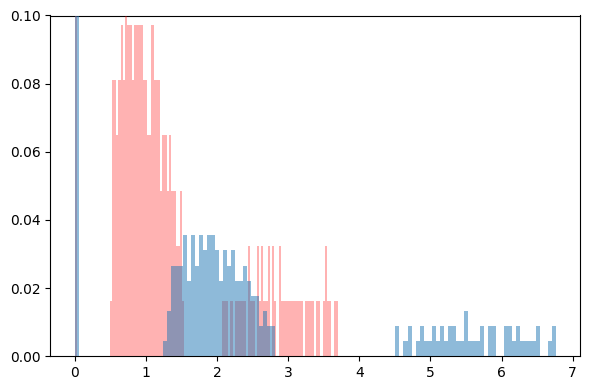

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(eig_As, 120, density=True, zorder=10, alpha=0.3, color='red',
            edgecolor='none')
ax.hist(eig_A, 120, density=True, zorder=10, alpha=0.5, edgecolor='none')
ax.set_ylim([0, 0.1])

plt.tight_layout()
plt.show()

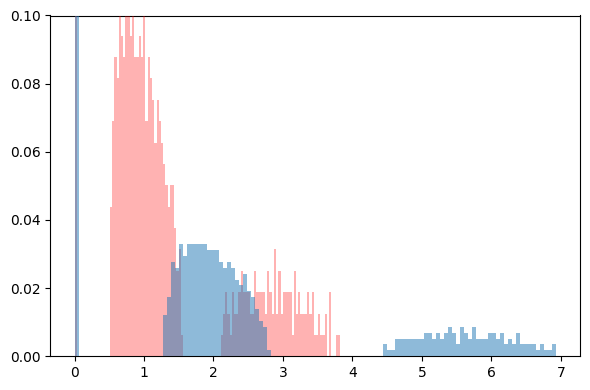

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(eig_As, 120, density=True, zorder=10, alpha=0.3, color='red',
            edgecolor='none')
ax.hist(eig_A, 120, density=True, zorder=10, alpha=0.5, edgecolor='none')
ax.set_ylim([0, 0.1])

plt.tight_layout()
plt.show()

Max density: 1.4999559661926751


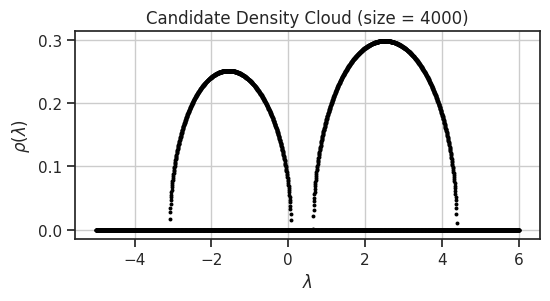

In [9]:
af.candidates(size=4000, verbose=True)

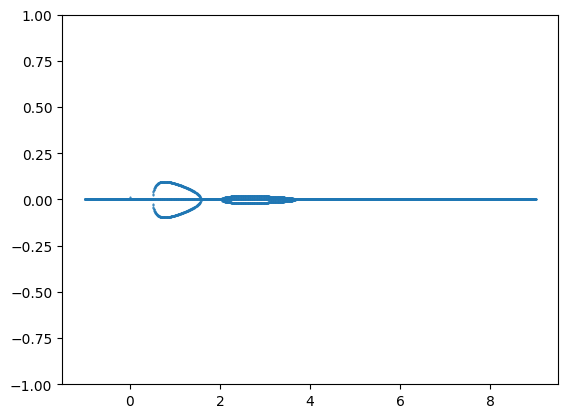

In [15]:
import numpy as np
import matplotlib.pyplot as plt

a = af.a_coeffs
dz = a.shape[0] - 1
s = a.shape[1] - 1

x = np.linspace(x_min, x_max, 2000)
delta = 1e-6
z = x + 1j * delta

rho_p = np.empty((s, x.size), dtype=float)

for k, zk in enumerate(z):
    coeff_m = np.array([np.sum(a[:, j] * (zk ** np.arange(dz + 1)))
                        for j in range(s + 1)], dtype=complex)
    r = np.roots(coeff_m[::-1])
    rho_p[:, k] = (1.0 / np.pi) * np.imag(r)

X = np.tile(x, s)
Y = rho_p.reshape(-1)

plt.figure()
plt.scatter(X, Y, s=0.2)
plt.ylim([-1, 1])
plt.show()

In [6]:
# a_true = dmp.poly().real
a_true = cp.poly().real
a_est = af.a_coeffs.real

ind = numpy.abs(a_true) > 1e-4
s = float(numpy.nanmean(a_true[ind] / a_est[ind]))

with np.printoptions(precision=6, suppress=True):
    print(a_true)
    print('')
    print(a_est * s)
    print('')
    print(1 - s * a_est / a_true)

[[ 1.      7.2125  9.9     0.    ]
 [ 0.      1.      7.5    11.    ]]

[[ 1.      7.2125  9.9     0.    ]
 [ 0.      1.      7.5    11.    ]]

[[ -0.   0.   0. -inf]
 [ nan  -0.   0.   0.]]


In [6]:
# af._stieltjes = dmp.stieltjes
# af.a_coeffs = dmp.poly()

[ 7.59535454e+00  4.16272378e+00  3.12568923e+00  1.00551816e+00
 -2.65949884e-16]

[-2.08710654e-18]

{'disc': array([-1.04706869e-28, -3.93709023e-13,  6.63922672e-13, -3.30174346e-13,
        6.29532829e-14, -3.96199578e-15]),
 'real_tol': 1e-16,
 'tol': 1e-16}


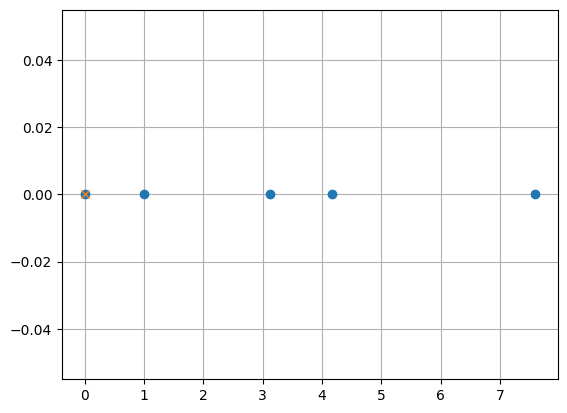

In [9]:
bp, leading_coeff_zeros, info = af.estimate_branch_points(
    tol=1e-16, real_tol=1e-16)
print(bp)
print('')
print(leading_coeff_zeros)
print('')
pprint(info)

plt.plot(bp.real, bp.imag, 'o')
plt.plot(leading_coeff_zeros.real, leading_coeff_zeros.imag, 'x')
plt.grid(True)
plt.show()

# FD

success rate per t: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


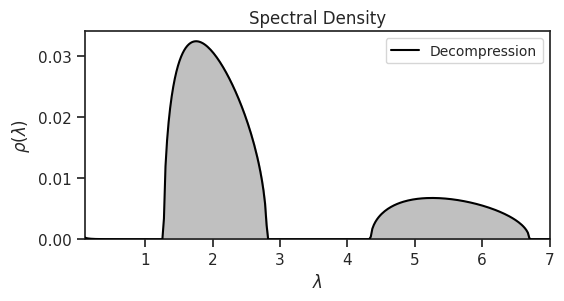

In [50]:
# Query grid on the real axis + a small imaginary buffer
x = numpy.linspace(x_min, x_max, 200)
# t = numpy.linspace(0, 4, 30)

# newton_opt = {'sweep': True}
# newton_opt = {
#     'sweep': True,
#     'sweep_pad': 200,          # much larger than 20
#     'active_imag_eps': 5e-7,   # or ~ 1*eta instead of 50*eta
# }

# -----------------------
# for _decompress.py
# newton_opt = {
#     # 'min_n_times': 50,
#     'sweep': True,
#     'sweep_pad': 30,
#     'active_imag_eps': 1e-6,
# }
# ------------------------
# ---------------------------
## For _decompress4.py
# newton_opt = {
#     "sweep": False,
#     "viterbi_opt": {
#         "lam_space": 1.0,
#         "lam_time": 0.25,
#         "lam_im": 10.0,      # hinge only
#         "edge_k": 12,
#         "lam_asym": 5.0,
#         "lam_norm": 20.0,    # important
#         "refine_newton": True,
#     },
# }

# ---------------------
# newton_opt = {}
# newton_opt = dict(newton_opt)
# newton_opt["eta_hi"] = 3.0
# newton_opt["n_eta"] = 24
# newton_opt["anchor_radius"] = 0.6
# newton_opt["herglotz_tol"] = 0.0  # your convention: Im(m)>0

# newton_opt["viterbi_opt"] = dict(
#     lam_time=0.25,
#     lam_space=1.0,
#     lam_asym=0.2,
#     lam_im2=0.0,     # <-- set to 0 for now
#     edge_k=8,
# )


# ---------------------------

# -------------------------
# For _decompress6.py

# newton_opt = {}
# newton_opt["eta_hi"] = 3.0
# newton_opt["n_eta"] = 24
# newton_opt["anchor_radius"] = 0.6
# newton_opt["herglotz_tol"] = 0.0

# newton_opt["edge_use"] = True
# newton_opt["edge_support"] = est_supp     # <-- from af.fit
# newton_opt["edge_pad"] = 0.0
# newton_opt["im_floor_rel"] = 0.5         # try 0.10–0.30
# newton_opt["w_min"] = 1e-14               # kills the 0j root

# newton_opt["viterbi_opt"] = dict(
#     lam_time=0.25,
#     lam_space=1.0,
#     lam_asym=0.2,
#     lam_im2=0.0,
#     edge_k=8,
# )

# -------------------------

# _defompress7.py
# newton_opt = {}
# newton_opt = dict(
#     max_iter=40, tol=1e-13,
#     damping=1.0, step_clip=5.0,
#     max_split=0,      # IMPORTANT: disable extra intermediate tau tries
#     sweep=False,      # IMPORTANT: avoid bad cross-x seeding
#     require_imw_pos=True, im_eps=1e-14,
#     verbose=False, debug=False,
# )

# newton_opt = dict(
#     max_iter=40, tol=1e-13, damping=1.0,
#     step_clip=5.0, max_split=0, sweep=False,
#     require_imw_pos=True, im_eps=1e-14,
#     verbose=False, debug=False,
# )

newton_opt = {}
# newton_opt['sweep'] = False
# newton_opt = dict(
#     max_iter=40, tol=1e-13, damping=1.0,
#     step_clip=5.0, max_split=8,      # <--- important
#     require_imw_pos=True, im_eps=1e-14,
#     verbose=False, debug=False,
# )


# Evolve
# rho, x = af.decompress([2000, 3000, 4000, 8000], method='one', newton_opt=newton_opt,
#                     verbose=True, plot=True)
# sizes = numpy.arange(1, 4.1, 0.5)
# sizes = numpy.arange(1, 1.5, 0.05)  # For def MP
# sizes = numpy.arange(1, 1, 0.05)  # For def MP
# sizes = [1.0, 1.01, 1.02, 1.05] 
# sizes = np.array([1.0, 1.01])   # smallest step first
# sizes = numpy.arange(1, 1.8, 0.25)
# x = numpy.linspace(0, 12, 100)  # for deformed MP
# x = numpy.linspace(0.5, 9, 100)  # for deformed MP
# x = numpy.linspace(-1, 8, 500)  # for deformed MP
# x = numpy.linspace(-2, 6, 500)
# af.n = As.shape[0]
# x = numpy.linspace(x_min, x_max, 100)
x = numpy.linspace(0.1, x_max, 300)
sizes = numpy.arange(As.shape[0], A.shape[0]+1, 500)

rho, x = af.decompress(sizes, x=x, method='one', min_n_times=100,
                       newton_opt=newton_opt,
                       verbose=True, plot=True, latex=False)

In [15]:
# ind = (x > 1) & (x < 12)
# numpy.trapz(rho[:, ind], x[ind])
numpy.trapz(rho[:, :], x)

array([0.10004263, 0.09050699, 0.08319129, 0.07664135, 0.07142566,
       0.06651997, 0.06245307, 0.05876024, 0.05539979, 0.05258322,
       0.04993508])

In [14]:
rho.shape

(5, 100)

Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-deformed-mp-decompress.pdf".


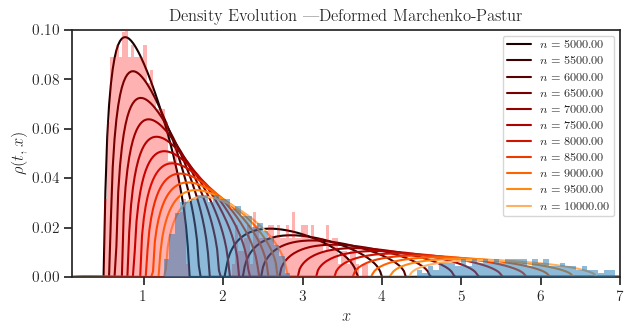

In [51]:
# times_to_show = numpy.arange(0, 1.51, 0.25)
# times_to_show = nump[y.arange(0, 4, 0.25)
# times_to_show = numpy.arange(0, 0.2, 0.05)
# idx = [int(numpy.argmin(numpy.abs(t - tt))) for tt in times_to_show]

num_plots = rho.shape[0]
cmap = plt.get_cmap('gist_heat')
colors = [cmap(i/(num_plots + 2)) for i in range(num_plots + 1)][1:]

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5))
    
    for i in range(rho.shape[0]):
        ax.plot(x, rho[i], color=colors[i], label=rf'$n={{{sizes[i]:0.2f}}}$')

    ax.hist(eig_As, 100, density=True, zorder=10, alpha=0.3, color='red',
            edgecolor='none')
    ax.hist(eig_A, 100, density=True, zorder=10, alpha=0.5, edgecolor='none')

    ax.set_xlim([x[0], x[-1]])
    # ax.set_ylim(bottom=0)
    ax.set_ylim([0, 0.1])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho(t, x)$')
    ax.set_title(r'Density Evolution |' + title)
    plt.legend(fontsize='x-small')
    
    plt.tight_layout()
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-decompress.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

In [45]:
sizes

array([ 5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,  9000,
        9500, 10000])

# DEBUG

In [13]:
from freealg import decompress_newton

def stieltjes_from_poly(z, a_coeffs):
    z = np.asarray(z, np.complex128).ravel()
    out = np.empty_like(z)
    for k, zk in enumerate(z):
        # coeffs in y descending for np.roots
        a = []
        for j in range(a_coeffs.shape[1]):  # j=0..s
            col = a_coeffs[:, j]
            v = col[-1] + 0j
            for i in range(len(col)-2, -1, -1):
                v = v*zk + col[i]
            a.append(v)
        coeff = np.array(a[::-1], np.complex128)
        roots = np.roots(coeff)

        target = -1.0/zk
        # prefer Im>0 if zk in C+
        if zk.imag > 0:
            cand = roots[roots.imag > 0]
            if cand.size == 0:
                cand = roots
        else:
            cand = roots
        out[k] = cand[np.argmin(np.abs(cand - target))]
    return out


def P_eval(z, y, a_coeffs):
    z = np.asarray(z, np.complex128)
    y = np.asarray(y, np.complex128)
    deg_z = a_coeffs.shape[0]-1
    s = a_coeffs.shape[1]-1
    out = np.zeros_like(z, dtype=np.complex128)
    for j in range(s+1):
        col = a_coeffs[:, j]
        aj = col[deg_z] + 0j
        for i in range(deg_z-1, -1, -1):
            aj = aj*z + col[i]
        out += aj * (y**j)
    return out

t_all = numpy.linspace(0, 1, 20)

In [45]:
from freealg import decompress_newton

# END OF DEBUG

# Edge and Cusp

In [42]:
t_cusp = numpy.linspace(0, 2, 100)
sol = af.cusp(t_cusp)
t_cusp = sol['t']
x_cusp = sol['x']
sol

{'ok': False,
 't': 1.1113340094758621,
 'tau': 3.038408958431699,
 'zeta': -0.016492759271034888,
 'y': 0.1974156816408218,
 'x': -10.341959011442336,
 'F': array([-3.34255386e-02,  1.78197373e-02, -2.02192178e-06]),
 'success': True,
 'seed': {'t': 1.1113340094758621,
  'x': 3.2133225455970758,
  'zeta': -0.5164927592710349,
  'y': -0.5465173988028822},
 'merge': {'bracketed': True},
 'gap_at_t': 4.440892098500626e-15,
 'lsq_success': True}

In [16]:
t = numpy.linspace(0.0, 1.5, 100)
complex_edges, real_merged_edges, active_k = af.edge(t, verbose=True)

edge success rate: 1.0


Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-compound-poisson-edge.pdf".


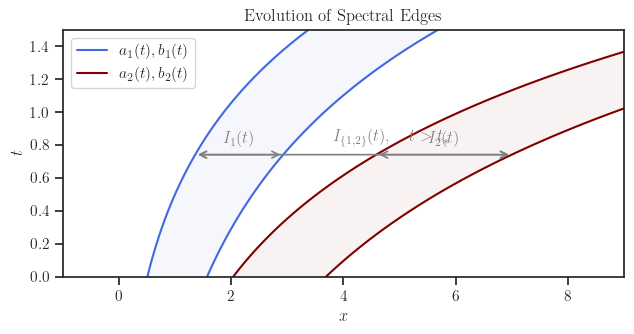

In [17]:
k = len(support)

colors = ['royalblue', 'maroon']

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5))
    for j in range(k):
        a_r = real_merged_edges[:, 2*j + 0]
        b_r = real_merged_edges[:, 2*j + 1]

        a_c = complex_edges[:, 2*j + 0].real
        b_c = complex_edges[:, 2*j + 1].real

        # Plot spectral edges with solid lines
        ax.plot(a_r, t, color=colors[j], label=rf'$a_{{{j+1}}}(t), b_{{{j+1}}}(t)$')
        ax.plot(b_r, t, color=colors[j])

        # Plot ghost edges with dashed lines
        m_a = numpy.isnan(a_r)
        m_b = numpy.isnan(b_r)
        ax.plot(a_c[m_a], t[m_a], '--', color=colors[j], alpha=0.25, zorder=-1)
        ax.plot(b_c[m_b], t[m_b], '--', color=colors[j], alpha=0.25, zorder=-1)

        # Fill between
        ax.fill_betweenx(t, a_c, b_c, color=colors[j], alpha=0.05, zorder=-2)
        
        # --------
        # Plot I_j
        # --------
        
        t_mid = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
        j_mid = int(numpy.argmin(numpy.abs(t - t_mid)))
        
        ax.annotate('', xy=(b_r[j_mid], t[j_mid]), xytext=(a_r[j_mid], t[j_mid]),
                    arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
        
        ax.text(0.5 * (a_r[j_mid] + b_r[j_mid]), t[j_mid] + 0.03 * (t[-1] - t[0]),
                fr'$I_{{{j+1}}}(t)$',
                color='gray', ha='center', va='bottom')

    # ----------------
    # Plot I_1 cup I_2
    # ----------------
    
    a_all = real_merged_edges[:, 0]
    b_all = real_merged_edges[:, -1]

    t_mid2 = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
    j_mid2 = int(numpy.argmin(numpy.abs(t - t_mid2)))
    
    ax.annotate('', xy=(b_all[j_mid2], t[j_mid2]), xytext=(a_all[j_mid2], t[j_mid2]),
                arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
    
    ax.text(0.58 * (a_all[j_mid2] + b_all[j_mid2]), t[j_mid2] + 0.03 * (t[-1] - t[0]),
            # r'$I_1(t) \cup I_2(t)$',
            r'$I_{\{1,2\}}(t), \quad t > t_{\ast}$',
            color='gray', ha='center', va='bottom')

    # ---------------------

    # Cusp
    # if 't_cusp' in globals():
    #     ax.plot(x_cusp, t_cusp, '*', color='black')
    #     ax.text(x_cusp + 0.08, t_cusp + 0.03, r'$(x_{\ast}, t_{\ast})$')

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([t[0], t[-1]])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$t$')
    ax.set_title(r'Evolution of Spectral Edges')
    ax.legend()
    plt.tight_layout()
    
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-edge.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-deformed-mp-complex_edge.pdf".


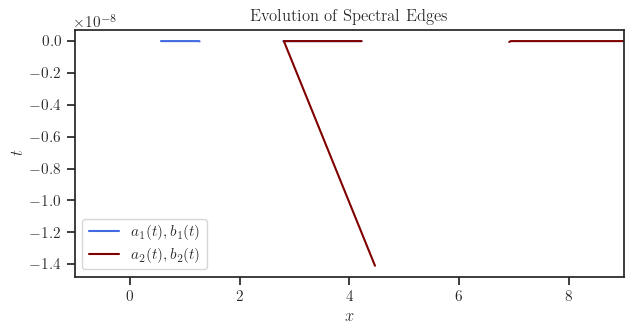

In [16]:
k = len(support)

colors = ['royalblue', 'maroon']

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5))
    for j in range(k):
        a_t = complex_edges[:, 2*j + 0]
        b_t = complex_edges[:, 2*j + 1]
        ax.plot(a_t.real, a_t.imag, color=colors[j], label=rf'$a_{{{j+1}}}(t), b_{{{j+1}}}(t)$')
        ax.plot(b_t.real, b_t.imag, color=colors[j])

    ax.set_xlim([x_min, x_max])
    # ax.set_ylim([t[0], t[-1]])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$t$')
    ax.set_title(r'Evolution of Spectral Edges')
    ax.legend()
    plt.tight_layout()
    
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-complex_edge.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

# Edge and Histogram

In [18]:
T = numpy.log(sizes[-1] / sizes[0])
t = numpy.linspace(0.0, T, 1000)
complex_edges, real_merged_edges, active_k = af.edge(t, verbose=True)

edge success rate: 1.0


Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-deformed-mp-edge-hist.pdf".


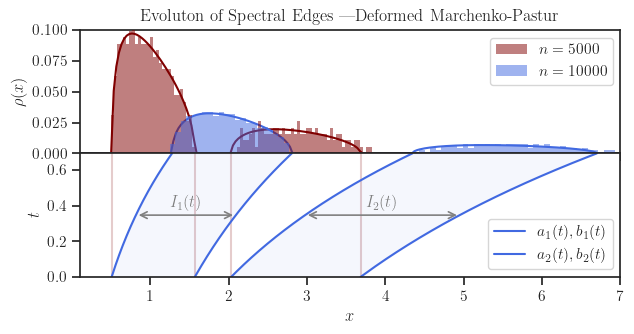

In [47]:
k = len(support)

x_min = 1e-1
x_max = 7

# colors = ['royalblue', 'maroon']
colors = ['royalblue', 'royalblue']

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5), nrows=2, sharex=True) 

    # Histogram
    ax[0].hist(eig_As, 100, density=True, zorder=10, alpha=0.5, color='maroon',
               edgecolor='none', label=rf'$n = {{{sizes[0]}}}$')
    ax[0].hist(eig_A, 100, density=True, zorder=10, alpha=0.5, color='royalblue',
               edgecolor='none', label=rf'$n = {{{sizes[-1]}}}$')
    
    ax[0].set_xlim([x[0], x[-1]])
    # ax[0].set_ylim(bottom=0)
    ax[0].set_ylim([0, 0.1])
    # ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$\rho(x)$')
    ax[0].set_title(r'Evoluton of Spectral Edges |' + title)
    ax[0].legend()
    ax[0].tick_params(labelbottom=False)

    # rho
    # num_plots = rho.shape[0]
    # cmap = plt.get_cmap('gist_heat')
    # colors = [cmap(i/(num_plots + 2)) for i in range(num_plots + 1)][1:]
    ax[0].plot(x, rho[0], color='maroon')
    ax[0].plot(x, rho[-1], color='royalblue')
    
    for j in range(k):
        a_r = real_merged_edges[:, 2*j + 0]
        b_r = real_merged_edges[:, 2*j + 1]

        a_c = complex_edges[:, 2*j + 0].real
        b_c = complex_edges[:, 2*j + 1].real

        # Plot spectral edges with solid lines
        ax[1].plot(a_r, t, color=colors[j], label=rf'$a_{{{j+1}}}(t), b_{{{j+1}}}(t)$')
        ax[1].plot(b_r, t, color=colors[j])

        # Plot ghost edges with dashed lines
        m_a = numpy.isnan(a_r)
        m_b = numpy.isnan(b_r)
        ax[1].plot(a_c[m_a], t[m_a], '--', color=colors[j], alpha=0.25, zorder=-1)
        ax[1].plot(b_c[m_b], t[m_b], '--', color=colors[j], alpha=0.25, zorder=-1)

        # Fill between
        ax[1].fill_betweenx(t, a_c, b_c, color=colors[j], alpha=0.05, zorder=-2)

        ax[1].axvline(a_c[0], color='maroon',alpha=0.2, zorder=-10)
        ax[1].axvline(b_c[0], color='maroon', alpha=0.2, zorder=-10)
        
        # --------
        # Plot I_j
        # --------
        
        t_mid = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
        j_mid = int(numpy.argmin(numpy.abs(t - t_mid)))
        
        ax[1].annotate('', xy=(b_r[j_mid], t[j_mid]), xytext=(a_r[j_mid], t[j_mid]),
                    arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
        
        ax[1].text(0.5 * (a_r[j_mid] + b_r[j_mid]), t[j_mid] + 0.03 * (t[-1] - t[0]),
                fr'$I_{{{j+1}}}(t)$',
                color='gray', ha='center', va='bottom')

    # ----------------
    # Plot I_1 cup I_2
    # ----------------
    
    # a_all = real_merged_edges[:, 0]
    # b_all = real_merged_edges[:, -1]

    # t_mid2 = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
    # j_mid2 = int(numpy.argmin(numpy.abs(t - t_mid2)))
    
    # ax[1].annotate('', xy=(b_all[j_mid2], t[j_mid2]), xytext=(a_all[j_mid2], t[j_mid2]),
    #                arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
    
    # ax[1].text(0.58 * (a_all[j_mid2] + b_all[j_mid2]), t[j_mid2] + 0.03 * (t[-1] - t[0]),
    #            # r'$I_1(t) \cup I_2(t)$',
    #            r'$I_{\{1,2\}}(t), \quad t > t_{\ast}$',
    #            color='gray', ha='center', va='bottom')

    # ---------------------

    # Cusp
    # if 't_cusp' in globals():
    #     ax[1].plot(x_cusp, t_cusp, '*', color='black')
    #     ax[1].text(x_cusp + 0.08, t_cusp + 0.03, r'$(x_{\ast}, t_{\ast})$')

    ax[1].set_xlim([x_min, x_max])
    ax[1].set_ylim([t[0], t[-1]])
    ax[1].set_xlabel(r'$x$')
    ax[1].set_ylabel(r'$t$')
    # ax[1].set_title(r'Evolution of Spectral Edges')
    ax[1].legend()
    
    plt.tight_layout()
    fig.subplots_adjust(hspace=0)
    
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-edge-hist.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

In [156]:
sizes

array([1500, 2000, 2500, 3000])